In [1]:
import cv2                 # working with, mainly resizing, images
import numpy as np         # dealing with arrays
import os                  # dealing with directories
from random import shuffle # mixing up or currently ordered data that might lead our network astray in training.
from tqdm import tqdm      # a nice pretty percentage bar for tasks. Thanks to viewer Daniel BA1/4hler for this suggestion

from keras.layers import Input, Dense, Activation, BatchNormalization, Flatten, Conv2D
from keras.layers import MaxPooling2D, Dropout
from keras.models import Model, load_model

import matplotlib.pyplot as plt

TRAIN_DIR = r'C:\Users\Jairaj Pisupati\AppData\Roaming\SPB_16.6\Gods_Classification\God\God_train'
TEST_DIR = r'C:\Users\Jairaj Pisupati\AppData\Roaming\SPB_16.6\Gods_Classification\God\God_test'
IMG_SIZE = 50

Using TensorFlow backend.


In [11]:
def label_img(img):
    word_label = img.split('.')[-2]
    word_label=word_label[-8:]
    if word_label == '_violent':
        return [1,0]
    else:
        return [0,1]

In [12]:
def create_train_data():
    training_data = []
    for img in tqdm(os.listdir(TRAIN_DIR)):
        label = label_img(img)
        path = os.path.join(TRAIN_DIR,img)
        if os.path.exists(path):
            img = cv2.imread(path,cv2.IMREAD_GRAYSCALE)
            try:
                img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
            except:
                print(path)
            training_data.append([np.array(img),np.array(label)])
    shuffle(training_data)
    np.save('train_data.npy', training_data)
    return training_data

In [14]:
train = create_train_data()
train = np.load("train_data.npy", allow_pickle=True)

100%|██████████| 751/751 [00:06<00:00, 107.61it/s]


In [15]:
def create_test_data():
    testing_data = []
    for img in tqdm(os.listdir(TEST_DIR)):
        label = label_img(img)
        path = os.path.join(TEST_DIR,img)
        img = cv2.imread(path,cv2.IMREAD_GRAYSCALE)
        try:
            img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
        except:
            print(path)
        testing_data.append([np.array(img),np.array(label)])
    shuffle(testing_data)
    np.save('test_data.npy', testing_data)
    return testing_data

In [16]:
test = create_test_data()
test = np.load("test_data.npy", allow_pickle=True)
print(test[0])

100%|██████████| 227/227 [00:02<00:00, 112.23it/s]


[array([[220, 220, 222, ..., 234, 226, 227],
       [221, 222, 225, ..., 226, 228, 228],
       [236, 236, 221, ..., 244, 235, 229],
       ...,
       [146, 169, 153, ...,  85,  89,  81],
       [ 72,  80,  86, ...,  75,  82,  73],
       [105,  97, 109, ...,  86,  87,  93]], dtype=uint8)
 array([1, 0])]


In [17]:
train_list=os.listdir('C://Users//Jairaj Pisupati//AppData//Roaming//SPB_16.6//Gods_Classification//God//God_train')
test_list=os.listdir('C://Users//Jairaj Pisupati//AppData//Roaming//SPB_16.6//Gods_Classification//God//God_test')
train_X = np.empty([len(train_list), IMG_SIZE, IMG_SIZE, 1])
train_Y = np.empty([len(train_list), 2])
test_X = np.empty([len(test_list), IMG_SIZE, IMG_SIZE, 1])
test_Y = np.empty([len(test_list),2])

In [18]:
print(len(train_list))

751


In [19]:
for i in range(len(train)):
    try:
        train_X[i] = train[i][0].reshape(IMG_SIZE, IMG_SIZE, 1)
        train_Y[i] = train[i][1]
    except:
        print(i)

for i in range(len(test)):
    try:
        test_X[i] = test[i][0].reshape(IMG_SIZE, IMG_SIZE, 1)
        test_Y[i] = test[i][1]
    except:
        print(i)

In [20]:
def model(input_shape):
    
    X_input = Input(input_shape)

    X = Conv2D(32, (5, 5), strides = (1, 1), name = 'conv0', padding='same')(X_input) #32 filters of 5*5 dimension
    X = BatchNormalization(axis = 3, name = 'bn0')(X)
    X = Activation('relu')(X)
    # MAXPOOL
    X = MaxPooling2D((5, 5), name='max_pool0', padding='same')(X)

    
    X = Conv2D(64, (5, 5), strides = (1, 1), name = 'conv1', padding='same')(X)
    X = BatchNormalization(axis = 3, name = 'bn1')(X)
    X = Activation('relu')(X)
    # MAXPOOL
    X = MaxPooling2D((5, 5), name='max_pool1', padding='same')(X)
    
    
    X = Conv2D(128, (5, 5), strides = (1, 1), name = 'conv2', padding='same')(X)
    X = BatchNormalization(axis = 3, name = 'bn2')(X)
    X = Activation('relu')(X)
    # MAXPOOL
    X = MaxPooling2D((5, 5), name='max_pool2', padding='same')(X)
    
        
    X = Conv2D(256, (5, 5), strides = (1, 1), name = 'conv3', padding='same')(X)
    X = BatchNormalization(axis = 3, name = 'bn3')(X)
    X = Activation('relu')(X)
    # MAXPOOL
    X = MaxPooling2D((5, 5), name='max_pool3', padding='same')(X)
        
        
    X = Conv2D(128, (5, 5), strides = (1, 1), name = 'conv4', padding='same')(X)
    X = BatchNormalization(axis = 3, name = 'bn4')(X)
    X = Activation('relu')(X)
    # MAXPOOL
    X = MaxPooling2D((5, 5), name='max_pool4', padding='same')(X)
    
    
    X = Conv2D(64, (5, 5), strides = (1, 1), name = 'conv5', padding='same')(X)
    X = BatchNormalization(axis = 3, name = 'bn5')(X)
    X = Activation('relu')(X)
    # MAXPOOL
    X = MaxPooling2D((5, 5), name='max_pool5', padding='same')(X)
    
    
    X = Conv2D(32, (5, 5), strides = (1, 1), name = 'conv6', padding='same')(X)
    X = BatchNormalization(axis = 3, name = 'bn6')(X)
    X = Activation('relu')(X)
    # MAXPOOL
    X = MaxPooling2D((5, 5), name='max_pool6', padding='same')(X)
    
    
    # FLATTEN X (means convert it to a vector) + FULLYCONNECTED
    X = Flatten()(X)
    X = Dense(1024, activation='relu', name='fc1')(X)
    X = Dropout(0.8)(X)
    
    X = Dense(2, activation='softmax', name='fc2')(X)

    # Create model. This creates your Keras model instance, you'll use this instance to train/test the model.
    model = Model(inputs = X_input, outputs = X, name='Model')
    
    return model

In [21]:
model = model(train_X.shape[1:])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])








Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.



In [24]:
model.fit(train_X, train_Y, epochs=7, shuffle=True, validation_data=(test_X, test_Y), verbose=2)

Train on 751 samples, validate on 227 samples
Epoch 1/7
 - 6s - loss: 0.0573 - acc: 0.9814 - val_loss: 0.3740 - val_acc: 0.8722
Epoch 2/7
 - 6s - loss: 0.0594 - acc: 0.9854 - val_loss: 0.2354 - val_acc: 0.8987
Epoch 3/7
 - 6s - loss: 0.0944 - acc: 0.9680 - val_loss: 0.3448 - val_acc: 0.9251
Epoch 4/7
 - 6s - loss: 0.0805 - acc: 0.9694 - val_loss: 0.4274 - val_acc: 0.8370
Epoch 5/7
 - 6s - loss: 0.0809 - acc: 0.9720 - val_loss: 0.0794 - val_acc: 0.9868
Epoch 6/7
 - 6s - loss: 0.0717 - acc: 0.9747 - val_loss: 0.0244 - val_acc: 1.0000
Epoch 7/7
 - 6s - loss: 0.0339 - acc: 0.9854 - val_loss: 0.0141 - val_acc: 0.9956


In [25]:
model.save("model2.h5")

In [15]:
model = load_model("model2.h5")

In [16]:

predict = model.evaluate(test_X, test_Y, verbose=2)

print("loss = " + str(predict[0]))
print("accuracy = " + str(predict[1]))

loss = 7.915172475333279
accuracy = 0.5013329778725674


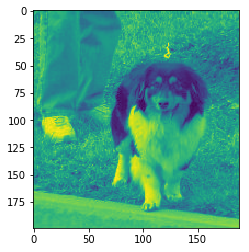

In [19]:
img_path = r'F:\desktop_links_are_from_here\final_year_project\cotur\PetImages\2.jpg'
img = cv2.imread(img_path,cv2.IMREAD_GRAYSCALE)
plt.imshow(img)

In [20]:
img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
pred = model.predict(img.reshape(1, IMG_SIZE, IMG_SIZE, 1))
if pred[0][0] > pred[0][1]:
    print("It's a cat!")
else:
    print("It's a dog!")

It's a cat!


In [21]:
print(pred[0][0])


0.99999976


In [22]:
print(pred[0][1])


2.3600023e-07


In [ ]:
print(pred)

In [10]:
img="0non_violent.jpg"
word_label = img.split('.')[-2]
word_label=word_label[-8:]
if word_label == '_violent':
    print('nv')
else:
    print("v")

nv
